In [1]:
import itertools
import os

import keras
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
%matplotlib inline

In [3]:
INPUT_SIZE = 299

In [4]:
data_dir = '../data/crop/'
label_path = '../breeds_8.txt'

breeds = []
with open(label_path, 'r') as f:
    lines = f.readlines()
    for line in lines:
        breeds.append(line.replace('\n', ''))

print(len(breeds))

8


In [5]:
def load_img(img_path):
    """ Load a image with (INPUT_SIZE, INPUT_SIZE)
    Returns: 
        RGB image as numpy array
    """
    img = image.load_img(img_path, target_size=(INPUT_SIZE, INPUT_SIZE))
    img = image.img_to_array(img)
    img /= 255
    
    return img

In [6]:
# Load all images and labels
X = []
y = []
for breed in breeds:
    print(breed)
    index = breeds.index(breed)
    imgs = os.listdir(data_dir + breed + '/')
    for img in imgs:
        img_path = data_dir + breed + '/' + img
        X.append(load_img(img_path))
        y.append(index)

border_collie
chihuahua
doberman
golden_retriever
pembroke
pomeranian
pug
toy_poodle


In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
y = np_utils.to_categorical(y)
print(X.shape, y.shape)

(679, 299, 299, 3) (679, 8)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(475, 299, 299, 3) (475, 8) (204, 299, 299, 3) (204, 8)


In [11]:
# Data augmentation
train_datagen = ImageDataGenerator(rotation_range=30, 
                                   zoom_range = 0.1, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = True)
train_generator = train_datagen.flow(X_train, y_train, shuffle=False, batch_size=10, seed=10)

In [12]:
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))

In [13]:
""" Transfer learning """
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
prediction = Dense(len(breeds), activation='softmax')(x)
model = keras.models.Model(inputs=base_model.input, outputs=prediction)

for layer in base_model.layers:
    layer.trainable=False

In [14]:
model.compile(optimizer=keras.optimizers.Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 149, 149, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 149, 149, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

__________________________________________________________________________________________________
mixed0 (Concatenate)            (None, 35, 35, 256)  0           activation_6[0][0]               
                                                                 activation_8[0][0]               
                                                                 activation_11[0][0]              
                                                                 activation_12[0][0]              
__________________________________________________________________________________________________
conv2d_16 (Conv2D)              (None, 35, 35, 64)   16384       mixed0[0][0]                     
__________________________________________________________________________________________________
batch_normalization_16 (BatchNo (None, 35, 35, 64)   192         conv2d_16[0][0]                  
__________________________________________________________________________________________________
activation

__________________________________________________________________________________________________
batch_normalization_20 (BatchNo (None, 35, 35, 64)   192         conv2d_20[0][0]                  
__________________________________________________________________________________________________
batch_normalization_22 (BatchNo (None, 35, 35, 64)   192         conv2d_22[0][0]                  
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 35, 35, 96)   288         conv2d_25[0][0]                  
__________________________________________________________________________________________________
batch_normalization_26 (BatchNo (None, 35, 35, 64)   192         conv2d_26[0][0]                  
__________________________________________________________________________________________________
activation_20 (Activation)      (None, 35, 35, 64)   0           batch_normalization_20[0][0]     
__________

batch_normalization_38 (BatchNo (None, 17, 17, 128)  384         conv2d_38[0][0]                  
__________________________________________________________________________________________________
activation_33 (Activation)      (None, 17, 17, 128)  0           batch_normalization_33[0][0]     
__________________________________________________________________________________________________
activation_38 (Activation)      (None, 17, 17, 128)  0           batch_normalization_38[0][0]     
__________________________________________________________________________________________________
average_pooling2d_4 (AveragePoo (None, 17, 17, 768)  0           mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 17, 17, 192)  147456      mixed3[0][0]                     
__________________________________________________________________________________________________
conv2d_34 

__________________________________________________________________________________________________
batch_normalization_41 (BatchNo (None, 17, 17, 192)  576         conv2d_41[0][0]                  
__________________________________________________________________________________________________
batch_normalization_44 (BatchNo (None, 17, 17, 192)  576         conv2d_44[0][0]                  
__________________________________________________________________________________________________
batch_normalization_49 (BatchNo (None, 17, 17, 192)  576         conv2d_49[0][0]                  
__________________________________________________________________________________________________
batch_normalization_50 (BatchNo (None, 17, 17, 192)  576         conv2d_50[0][0]                  
__________________________________________________________________________________________________
activation_41 (Activation)      (None, 17, 17, 192)  0           batch_normalization_41[0][0]     
__________

activation_60 (Activation)      (None, 17, 17, 192)  0           batch_normalization_60[0][0]     
__________________________________________________________________________________________________
mixed6 (Concatenate)            (None, 17, 17, 768)  0           activation_51[0][0]              
                                                                 activation_54[0][0]              
                                                                 activation_59[0][0]              
                                                                 activation_60[0][0]              
__________________________________________________________________________________________________
conv2d_65 (Conv2D)              (None, 17, 17, 192)  147456      mixed6[0][0]                     
__________________________________________________________________________________________________
batch_normalization_65 (BatchNo (None, 17, 17, 192)  576         conv2d_65[0][0]                  
__________

batch_normalization_74 (BatchNo (None, 17, 17, 192)  576         conv2d_74[0][0]                  
__________________________________________________________________________________________________
activation_74 (Activation)      (None, 17, 17, 192)  0           batch_normalization_74[0][0]     
__________________________________________________________________________________________________
conv2d_71 (Conv2D)              (None, 17, 17, 192)  147456      mixed7[0][0]                     
__________________________________________________________________________________________________
conv2d_75 (Conv2D)              (None, 17, 17, 192)  258048      activation_74[0][0]              
__________________________________________________________________________________________________
batch_normalization_71 (BatchNo (None, 17, 17, 192)  576         conv2d_71[0][0]                  
__________________________________________________________________________________________________
batch_norm

activation_84 (Activation)      (None, 8, 8, 384)    0           batch_normalization_84[0][0]     
__________________________________________________________________________________________________
batch_normalization_85 (BatchNo (None, 8, 8, 192)    576         conv2d_85[0][0]                  
__________________________________________________________________________________________________
activation_77 (Activation)      (None, 8, 8, 320)    0           batch_normalization_77[0][0]     
__________________________________________________________________________________________________
mixed9_0 (Concatenate)          (None, 8, 8, 768)    0           activation_79[0][0]              
                                                                 activation_80[0][0]              
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 8, 8, 768)    0           activation_83[0][0]              
          

                                                                 mixed9_1[0][0]                   
                                                                 concatenate_2[0][0]              
                                                                 activation_94[0][0]              
__________________________________________________________________________________________________
global_average_pooling2d_1 (Glo (None, 2048)         0           mixed10[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 512)          1049088     global_average_pooling2d_1[0][0] 
__________________________________________________________________________________________________
dense_2 (Dense)                 (None, 8)            4104        dense_1[0][0]                    
Total params: 22,855,976
Trainable params: 1,053,192
Non-trainable params: 21,802,784
_______________________

In [16]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=175,
                              validation_data=(X_test, y_test),
                              validation_steps=44,
                              epochs=50,
                              verbose=2)

Epoch 1/50
 - 36s - loss: 1.0068 - acc: 0.7000 - val_loss: 0.1752 - val_acc: 0.9804
Epoch 2/50
 - 30s - loss: 0.4706 - acc: 0.8548 - val_loss: 0.0644 - val_acc: 0.9902
Epoch 3/50
 - 31s - loss: 0.3899 - acc: 0.8709 - val_loss: 0.0615 - val_acc: 0.9804
Epoch 4/50
 - 31s - loss: 0.3304 - acc: 0.8971 - val_loss: 0.0691 - val_acc: 0.9804
Epoch 5/50
 - 32s - loss: 0.2987 - acc: 0.9034 - val_loss: 0.0535 - val_acc: 0.9853
Epoch 6/50
 - 32s - loss: 0.2644 - acc: 0.9120 - val_loss: 0.0489 - val_acc: 0.9902
Epoch 7/50
 - 31s - loss: 0.2209 - acc: 0.9269 - val_loss: 0.0515 - val_acc: 0.9853
Epoch 8/50
 - 31s - loss: 0.1965 - acc: 0.9371 - val_loss: 0.0525 - val_acc: 0.9804
Epoch 9/50
 - 32s - loss: 0.1748 - acc: 0.9497 - val_loss: 0.0580 - val_acc: 0.9853
Epoch 10/50
 - 31s - loss: 0.1622 - acc: 0.9463 - val_loss: 0.0540 - val_acc: 0.9853
Epoch 11/50
 - 31s - loss: 0.1589 - acc: 0.9457 - val_loss: 0.0515 - val_acc: 0.9804
Epoch 12/50
 - 31s - loss: 0.1485 - acc: 0.9554 - val_loss: 0.0525 - val_a

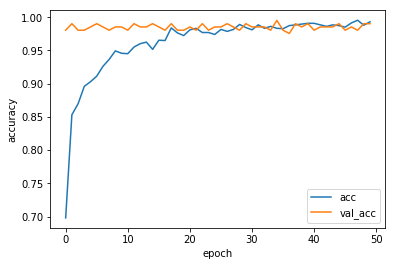

In [17]:
plt.plot(history.history['acc'], label='acc')
plt.plot(history.history['val_acc'], label='val_acc')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

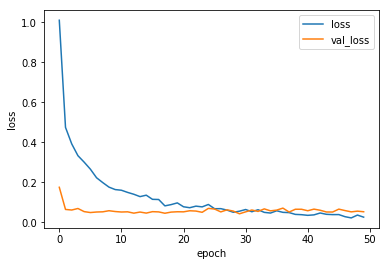

In [18]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [19]:
score = model.evaluate(X_test, y_test, batch_size=32)
list(zip(model.metrics_names, score))

204/204 [==============================] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 11ms/step


[('loss', 0.0528568346783811), ('acc', 0.990196079600091)]

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = (8, 8)

def plot_confusion_matrix(cm, breeds, normalize=False, title='Confusion matrix',
    cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
       
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
             
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(breeds))
    plt.xticks(tick_marks, breeds, rotation=45)
    plt.yticks(tick_marks, breeds)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

Confusion matrix, without normalization


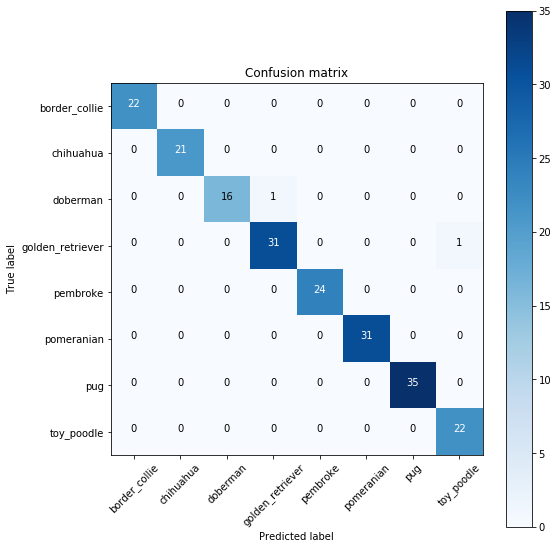

In [21]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(confusion_mtx, breeds)

border_collie


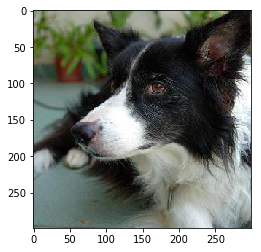

In [22]:
test_index = 10
rcParams['figure.figsize'] = (4, 4)

plt.imshow(X[test_index, :, :, :])
test_img = np.reshape(X[test_index, :, :, :], (1, INPUT_SIZE, INPUT_SIZE, 3))

predict = model.predict(test_img)
print(breeds[np.argmax(predict)])

doberman


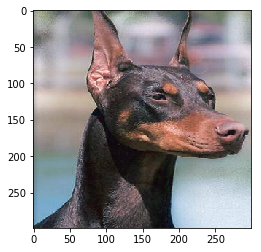

In [23]:
test_index = 200
rcParams['figure.figsize'] = (4, 4)

plt.imshow(X[test_index, :, :, :])
test_img = np.reshape(X[test_index, :, :, :], (1, INPUT_SIZE, INPUT_SIZE, 3))

predict = model.predict(test_img)
print(breeds[np.argmax(predict)])

In [24]:
model.save('model_8.h5')